<a href="https://colab.research.google.com/github/Dias04404/sistemas-energia-eolica/blob/main/Atividade_02_Caico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 02 Eólica

***Potência do Vento e Distribuição de Weibull***

## DataSet

In [ ]:
#### IMPORTAR BIBLIOTECAS ####
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### IMPORTAR DADOS ####
from google.colab import drive
drive.mount('/content/drive')
pasta = '/content/drive/MyDrive/eolica/caico' # DEFINIR PASTA COM OS CSVs

#### CRIA LISTAS ####
arquivos = [f for f in os.listdir(pasta) if f.lower().endswith('.csv')]
lista_df = [] # LISTA COM DATAFRAMES
colunas_remover = [ # LISTA COM COLUNAS PARA REMOVER
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Unnamed: 19',
    'Hora UTC', ''  # caso apareça
]

#### PREPARAÇÃO DOS CASOS ESPECIAIS ####
def ler_arquivo_inmet(caminho): # FUNÇÃO PARA LER E NORMALIZAR ARQUIVOS A PARTIR DE 2019
    with open(caminho, 'r', encoding='latin1') as f:  # CODIFICA PARA LEITURA DOS ARQUIVOS
        linhas = f.readlines()[8:]  # PULA OS METADADOS
        linhas = [linha.strip() for linha in linhas if linha.strip()]
    dados = [linha.split(';') for linha in linhas]  # CONVERTE O SEPARADOR DE COLUNAS
    df = pd.DataFrame(dados)
    colunas = df.iloc[0]  # TRANSFORMA A PRIMEIRA LINHA EM NOME DAS COLUNAS
    df = df[1:]  # REMOVE A PRIMEIRA LINHA DO DF
    df.columns = colunas
    df = df.loc[:, ~df.columns.duplicated()]
    df.drop(columns=[col for col in colunas_remover if col in df.columns], inplace=True)  # REMOVE LISTA DE COLUNAS
    return df

#### PROCESSAR ARQUIVOS ####
for arquivo in arquivos:
    caminho = os.path.join(pasta, arquivo)
    try:
        # VERIFICA SE O ARQUIVO É DE 2019 OU MAIS RECENTE
        if any(ano in arquivo for ano in ['2019', '2020', '2021', '2022', '2023', '2024']):
            df = ler_arquivo_inmet(caminho) # RODA A FUNÇÃO
        else:
            df = pd.read_csv(
                caminho,
                skiprows=8,
                encoding='latin1',
                sep=';',
                decimal=',',
                on_bad_lines='skip'
            )
            df = df.loc[:, ~df.columns.duplicated()]
            df.drop(columns=[col for col in colunas_remover if col in df.columns], inplace=True)

        # RENOMEIA A COLUNA DE DATA
        if 'DATA (YYYY-MM-DD)' in df.columns:
            df.rename(columns={'DATA (YYYY-MM-DD)': 'Data'}, inplace=True)
        # RENOMEIA A COLUNA DE VELOCIDADE
        if 'VENTO, VELOCIDADE HORARIA (m/s)' in df.columns:
            df.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
        # RENOMEIA A COLUNA DE VELOCIDADE MÁX
        if 'VENTO, RAJADA MAXIMA (m/s)' in df.columns:
            df.rename(columns={'VENTO, RAJADA MAXIMA (m/s)': 'VELOCIDADE MÁX (m/s)'}, inplace=True)

        # CONVERTE PARA DATETIME E CRIA COLUNAS ANO/MÊS/DIA
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

        df['Ano'] = df['Data'].dt.year
        df['Mês'] = df['Data'].dt.month
        df['Dia'] = df['Data'].dt.day

        # TRATA VALORES 9999 COMO NaN
        df.replace('-9999', pd.NA, inplace=True)
        df.replace('-9999.0', pd.NA, inplace=True)

        lista_df.append(df) # ADICIONA O DF A LISTA

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

#### CONCATENAR TODOS OS DATAFRAMES ####
df_final = pd.concat(lista_df, ignore_index=True)
caminho_saida = '/content/drive/MyDrive/eolica/dados_caico.csv'
df_final.to_csv(caminho_saida, index=False) # SALVAR COMO CSV FINAL

#### EXIBIR INFOS FINAIS ####
print("Colunas finais:", df_final.columns.tolist())
df_final

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Colunas finais: ['Data', 'HORA (UTC)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VELOCIDADE MÁX (m/s)', 'VELOCIDADE (m/s)', 'Ano', 'Mês', 'Dia']


,Data,HORA (UTC),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))",VELOCIDADE MÁX (m/s),VELOCIDADE (m/s),Ano,Mês,Dia
0,2015-01-01,00:00,127,8.7,4.6,2015,1,1
1,2015-01-01,01:00,107,7.9,3.2,2015,1,1
2,2015-01-01,02:00,90,8.4,3.2,2015,1,1
3,2015-01-01,03:00,90,8.2,3.0,2015,1,1
4,2015-01-01,04:00,109,9.0,3.3,2015,1,1
...,...,...,...,...,...,...,...,...
87667,2024-12-31,NaN,66,"6,6","2,9",2024,12,31
87668,2024-12-31,NaN,69,"8,3","2,1",2024,12,31
87669,2024-12-31,NaN,55,"5,9","2,6",2024,12,31
87670,2024-12-31,NaN,54,"6,8","2,7",2024,12,31


# Tarefa 05

Considerar a localidade da Tarefa 4, considerando dois anos diferentes e traça a curva de Weibull, considerando **3 diferentes tipos de k para cada c considerado**


**Caicó**

*   2015
*   2024

<ipython-input-63-b93628f4d994>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df51['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
<ipython-input-63-b93628f4d994>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

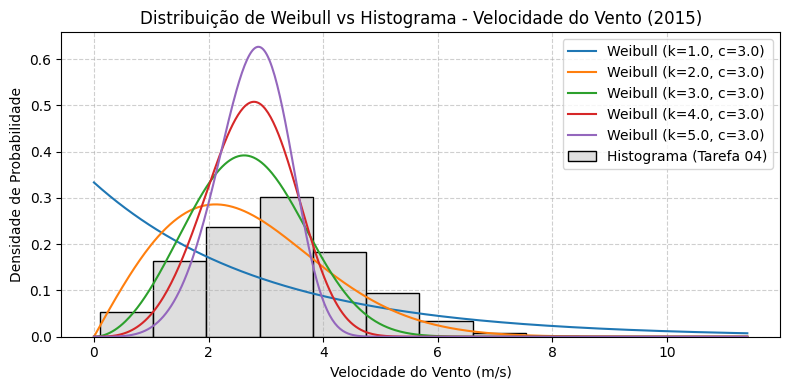

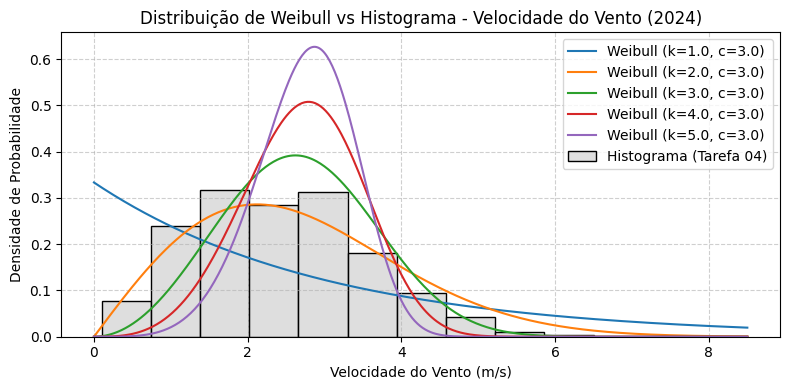

In [ ]:
# MODELAGEM 01

# Para C = 3.0

# IMPORTAÇÃO E LIMPEZA DAS COLUNAS

caminhos5 = {
    '2015': '/content/drive/MyDrive/eolica/caico/INMET_NE_RN_A316_CAICO_01-01-2015_A_31-12-2015.CSV',
    '2024': '/content/drive/MyDrive/eolica/caico/INMET_NE_RN_A316_CAICO_01-01-2024_A_31-12-2024.CSV'
}

colunas_remover5 = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Unnamed: 19',
    'Hora UTC', ''
]

# TRATAMENTO PARA CADA ANO

dfs51 = {}

for ano51, caminho5 in caminhos5.items():
    df51 = pd.read_csv(caminho5, skiprows=8, encoding='latin1', sep=';', decimal=',', on_bad_lines='skip')
    df51 = df51.loc[:, ~df51.columns.duplicated()]
    df51.drop(columns=[col for col in colunas_remover5 if col in df51.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df51.columns:
        df51.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    df51['VELOCIDADE (m/s)'] = pd.to_numeric(df51['VELOCIDADE (m/s)'], errors='coerce')
    df51['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
    df51['Ano'] = int(ano51)
    dfs51[ano51] = df51

dfs52 = {}

for ano52, caminho5 in caminhos5.items():
    df52 = pd.read_csv(caminho5, skiprows=8, encoding='latin1', sep=';', decimal=',', on_bad_lines='skip')
    df52 = df52.loc[:, ~df52.columns.duplicated()]
    df52.drop(columns=[col for col in colunas_remover5 if col in df52.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df52.columns:
        df52.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    df52['VELOCIDADE (m/s)'] = pd.to_numeric(df52['VELOCIDADE (m/s)'], errors='coerce')
    df52['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
    df52['Ano'] = int(ano52)
    dfs52[ano52] = df52

ano_escolhido51 = '2015'
dados51 = dfs51[ano_escolhido51]['VELOCIDADE (m/s)'].dropna()

ano_escolhido52 = '2024'
dados52 = dfs52[ano_escolhido52]['VELOCIDADE (m/s)'].dropna()

# DISTRIBUIIÇÃO DE WEIBULL

c = 3.0  # Parâmetro de escala
k_values = [1.0, 2.0, 3.0, 4.0, 5.0] # Parâmetro de forma

# Eixo x para a função PDF
x = np.linspace(0, dados51.max() + 2, 500)
x2 = np.linspace(0, dados52.max() + 2, 500)

# Função da PDF da Weibull
def weibull_pdf(x, k, c): # 2015
    return (k / c) * (x / c)**(k - 1) * np.exp(-(x / c)**k)
def weibull_pdf2(x2, k, c): # 2024
    return (k / c) * (x2 / c)**(k - 1) * np.exp(-(x2 / c)**k)


##############################  2015   #################################

# Plotar histograma relacionado
plt.figure(figsize=(8, 4))
sns.histplot(dados51, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf(x, k, c)
    plt.plot(x, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido51})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

##############################  2024   ################################

# Plotar histograma relacionado
plt.figure(figsize=(8,4))
sns.histplot(dados52, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf2(x2, k, c)
    plt.plot(x2, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido52})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

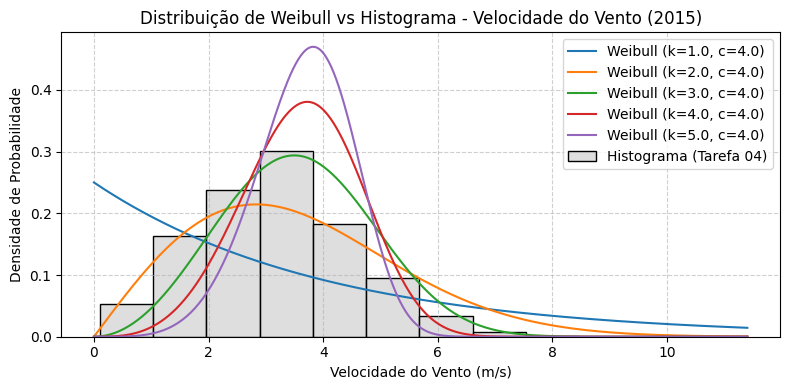

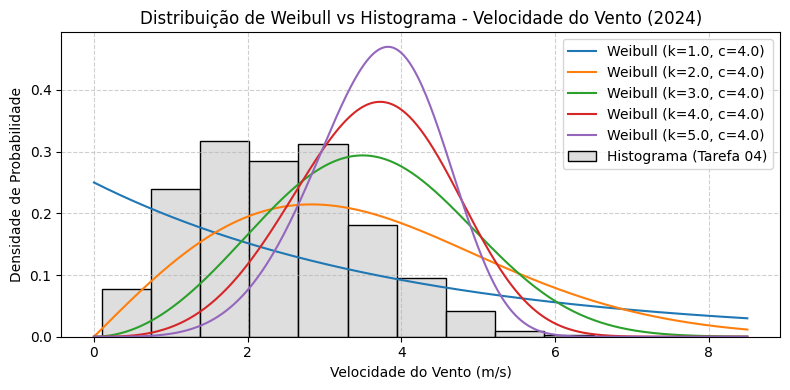

In [ ]:
# MODELAGEM 02

# Para C = 4.0

# DISTRIBUIIÇÃO DE WEIBULL

c = 4.0  # Parâmetro de escala
k_values = [1.0, 2.0, 3.0, 4.0, 5.0] # Parâmetro de forma

# Eixo x para a função PDF
x = np.linspace(0, dados51.max() + 2, 500)
x2 = np.linspace(0, dados52.max() + 2, 500)

# Função da PDF da Weibull
def weibull_pdf(x, k, c): # 2015
    return (k / c) * (x / c)**(k - 1) * np.exp(-(x / c)**k)
def weibull_pdf2(x2, k, c): # 2024
    return (k / c) * (x2 / c)**(k - 1) * np.exp(-(x2 / c)**k)


##############################  2015   #################################

# Plotar histograma relacionado
plt.figure(figsize=(8, 4))
sns.histplot(dados51, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf(x, k, c)
    plt.plot(x, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido51})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

##############################  2024   ################################

# Plotar histograma relacionado
plt.figure(figsize=(8,4))
sns.histplot(dados52, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma (Tarefa 04)')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf2(x2, k, c)
    plt.plot(x2, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido52})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

-------

# Tarefa 06

Considerar uma outra localidade, nos mesmos anos, e traçar a curva de Weibull,
considerando os mesmos 3 diferentes tipos de k para cada c considerado da questão
anterior.


**Mossoró**

*   2015
*   2024

<ipython-input-74-8fc153d8db6c>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df61['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
<ipython-input-74-8fc153d8db6c>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

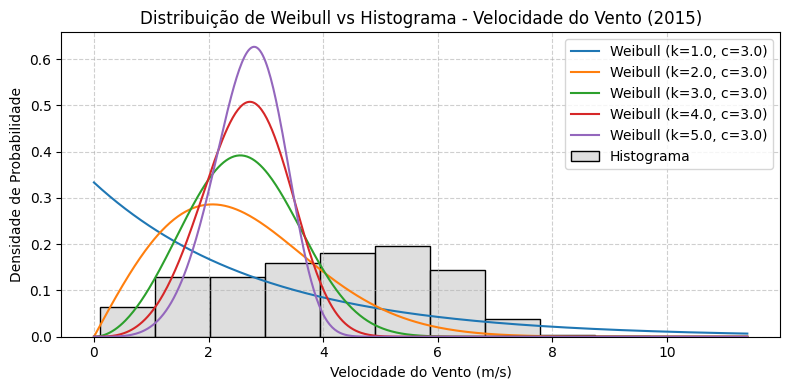

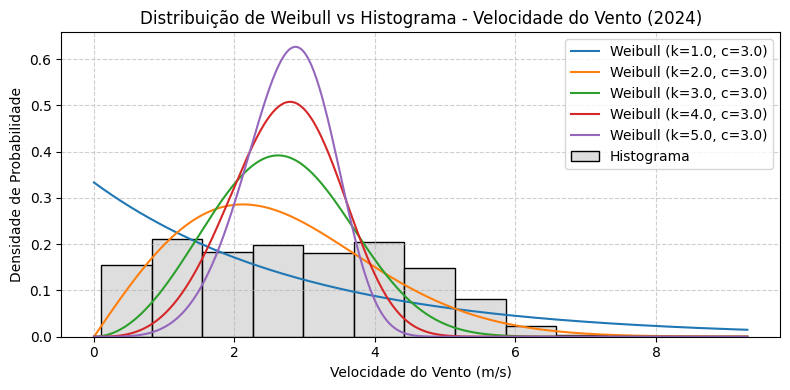

In [ ]:
# MODELAGEM 03

# Para C = 3.0

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTAÇÃO E LIMPEZA DAS COLUNAS

caminhos6 = {
    '2015': '/content/drive/MyDrive/eolica/mossoro/INMET_NE_RN_A318_MOSSORO_01-01-2015_A_31-12-2015.CSV',
    '2024': '/content/drive/MyDrive/eolica/mossoro/INMET_NE_RN_A318_MOSSORO_01-01-2024_A_31-12-2024.CSV'
}

colunas_remover6 = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Unnamed: 19',
    'Hora UTC', ''
]

# TRATAMENTO PARA CADA ANO

dfs61 = {}

for ano61, caminho6 in caminhos6.items():
    df61 = pd.read_csv(caminho6, skiprows=8, encoding='latin1', sep=';', decimal=',', on_bad_lines='skip')
    df61 = df61.loc[:, ~df61.columns.duplicated()]
    df61.drop(columns=[col for col in colunas_remover6 if col in df61.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df61.columns:
        df61.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    df61['VELOCIDADE (m/s)'] = pd.to_numeric(df61['VELOCIDADE (m/s)'], errors='coerce')
    df61['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
    df61['Ano'] = int(ano61)
    dfs61[ano61] = df61

dfs62 = {}

for ano62, caminho6 in caminhos6.items():
    df62 = pd.read_csv(caminho6, skiprows=8, encoding='latin1', sep=';', decimal=',', on_bad_lines='skip')
    df62 = df62.loc[:, ~df62.columns.duplicated()]
    df62.drop(columns=[col for col in colunas_remover6 if col in df62.columns], inplace=True)
    if 'VENTO, VELOCIDADE HORARIA (m/s)' in df62.columns:
        df61.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VELOCIDADE (m/s)'}, inplace=True)
    df62['VELOCIDADE (m/s)'] = pd.to_numeric(df61['VELOCIDADE (m/s)'], errors='coerce')
    df62['VELOCIDADE (m/s)'].replace([-9999, -9999.0], np.nan, inplace=True)
    df62['Ano'] = int(ano61)
    dfs62[ano61] = df62

ano_escolhido61 = '2015'
dados61 = dfs61[ano_escolhido61]['VELOCIDADE (m/s)'].dropna()

ano_escolhido62 = '2024'
dados62 = dfs62[ano_escolhido62]['VELOCIDADE (m/s)'].dropna()

# DISTRIBUIÇÃO DE WEIBULL

c = 3.0  # Parâmetro de escala
k_values = [1.0, 2.0, 3.0, 4.0, 5.0] # Parâmetro de forma

# Eixo x para a função PDF
x6 = np.linspace(0, dados61.max() + 2, 500)
x62 = np.linspace(0, dados62.max() + 2, 500)

# Função da PDF da Weibull
def weibull_pdf6(x, k, c): # 2015
    return (k / c) * (x6 / c)**(k - 1) * np.exp(-(x6 / c)**k)
def weibull_pdf62(x2, k, c): # 2024
    return (k / c) * (x62 / c)**(k - 1) * np.exp(-(x62 / c)**k)


##############################  2015   #################################

# Plotar histograma relacionado
plt.figure(figsize=(8, 4))
sns.histplot(dados61, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf6(x6, k, c)
    plt.plot(x, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido61})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

##############################  2024   ################################

# Plotar histograma relacionado
plt.figure(figsize=(8,4))
sns.histplot(dados62, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf62(x62, k, c)
    plt.plot(x62, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido62})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

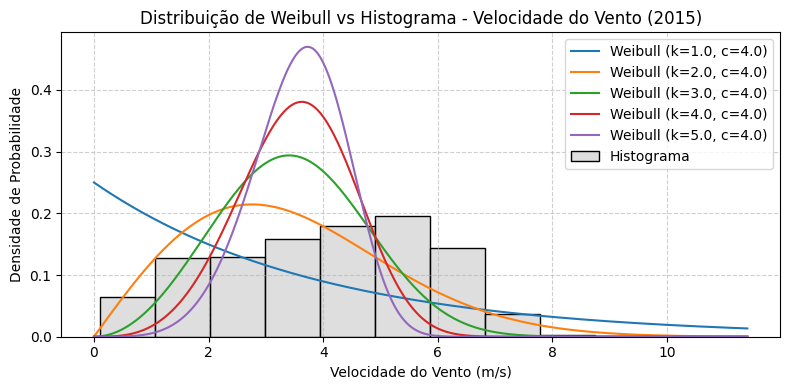

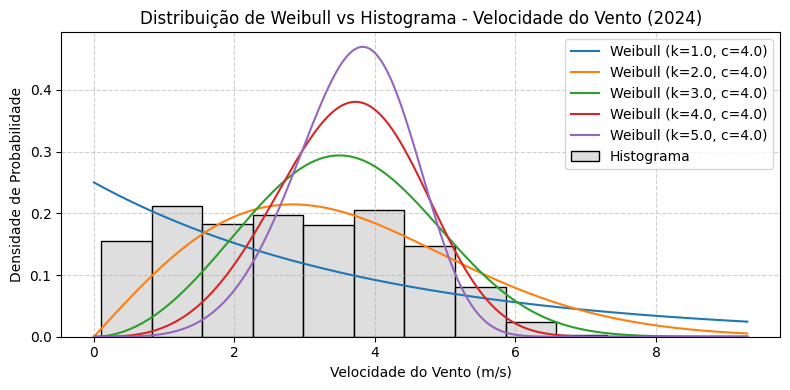

In [ ]:
# MODELAGEM 04

# Para C = 4.0


# DISTRIBUIÇÃO DE WEIBULL

c = 4.0  # Parâmetro de escala
k_values = [1.0, 2.0, 3.0, 4.0, 5.0] # Parâmetro de forma

# Eixo x para a função PDF
x6 = np.linspace(0, dados61.max() + 2, 500)
x62 = np.linspace(0, dados62.max() + 2, 500)

# Função da PDF da Weibull
def weibull_pdf6(x, k, c): # 2015
    return (k / c) * (x6 / c)**(k - 1) * np.exp(-(x6 / c)**k)
def weibull_pdf62(x2, k, c): # 2024
    return (k / c) * (x62 / c)**(k - 1) * np.exp(-(x62 / c)**k)


##############################  2015   #################################

# Plotar histograma relacionado
plt.figure(figsize=(8, 4))
sns.histplot(dados61, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf6(x6, k, c)
    plt.plot(x, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido61})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()

##############################  2024   ################################

# Plotar histograma relacionado
plt.figure(figsize=(8,4))
sns.histplot(dados62, bins=10, stat='density', color='lightgray', edgecolor='black', label='Histograma')

# Adiciona curvas da Weibull
for k in k_values:
    pdf = weibull_pdf62(x62, k, c)
    plt.plot(x62, pdf, label=f'Weibull (k={k}, c={c})')

# Configurações do gráfico
plt.title(f'Distribuição de Weibull vs Histograma - Velocidade do Vento ({ano_escolhido62})')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Plotar histograma normalizado (density=True)
plt.tight_layout()
plt.show()
